In [54]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Load the data from the Excel file
data = pd.read_csv('../Resource/FLUXNET2015/China_Data/FLX_CN-Cha_FLUXNET2015_HH_2003-2005_DelZero_SW.csv',parse_dates=['TIMESTAMP_START'],index_col=[0])
data.head()

,TA_F,SW_IN_F,LW_IN_F,VPD_F,PA_F,WS_F,RH
TIMESTAMP_START,,,,,,,
2003-01-01 06:30:00,-20.92,0.901,136.9,0.441,93.3,2.133,61.70
2003-01-01 07:00:00,-21.08,27.460,136.3,0.404,93.4,2.814,64.40
2003-01-01 07:30:00,-20.82,91.000,135.1,0.408,93.4,1.794,64.84
2003-01-01 08:00:00,-20.10,173.500,133.6,0.452,93.4,1.796,63.44
2003-01-01 08:30:00,-19.05,255.200,133.8,0.537,93.4,2.193,60.31


In [55]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
TA_F,26297.0,7.691160,12.730470,-27.760,-2.040,10.670,18.240,30.270
SW_IN_F,26297.0,321.329947,249.335481,0.002,101.200,275.800,498.400,1016.580
LW_IN_F,26297.0,285.525869,75.364293,119.600,222.500,293.996,348.600,436.700
VPD_F,26297.0,5.811278,5.570077,0.000,1.292,3.931,8.983,31.048
PA_F,26297.0,92.648816,0.603631,90.200,92.200,92.600,93.100,94.700
WS_F,26297.0,2.779154,1.549165,0.000,1.530,2.555,3.856,9.200
RH,26297.0,57.216029,23.938793,0.000,36.990,56.130,76.230,100.000


In [56]:
# Split the data into features (X) and target (y)
# X = data.drop([[]], axis=1)
X = data.drop(['SW_IN_F'],axis=1)
y = data['SW_IN_F']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

# print("X_Train:",X_train)
# print("X_Test:",X_test)


## 查看训练集和测试集的mean 和 std

In [57]:
import numpy as np
x_train_mean = X_train.mean()
x_test_mean = X_test.mean()
y_train_mean = y_train.mean()
y_test_mean = y_test.mean()

In [58]:
x_train_mean

TA_F         7.676102
LW_IN_F    285.245257
VPD_F        5.855226
PA_F        92.652970
WS_F         2.788568
RH          56.999016
dtype: float64

In [59]:
x_test_mean

TA_F         7.726289
LW_IN_F    286.180524
VPD_F        5.708748
PA_F        92.639124
WS_F         2.757192
RH          57.722309
dtype: float64

In [60]:
y_train_mean

322.5484693323192

In [61]:
y_test_mean

318.4871920152092

In [62]:

from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the training data
scaler.fit(X_train)

# Transform both the training and testing data
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

StandardScaler()

C:\Users\AnleHrc\AppData\Local\Temp\ipykernel_20260\202614004.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train, hist=True, kde=False, label='Train Data')
C:\Users\AnleHrc\AppData\Local\Temp\ipykernel_20260\202614004.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_test, hist=True

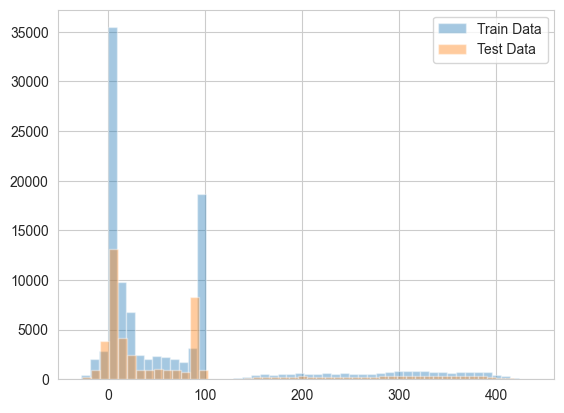

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# 绘制直方图
sns.distplot(X_train, hist=True, kde=False, label='Train Data')
sns.distplot(X_test, hist=True, kde=False, label='Test Data')

plt.legend()
plt.show()

其中 $\xi$ 是介于 $x$ 和 $2$ 之间的某个数，根据拉格朗日中值定理，有：

In [64]:
# Define the XGBoost model
model = xgb.XGBRegressor()

# Train the model on the training set
model.fit(X_train, y_train)

# Evaluate the model on the testing set
y_P_train = model.predict(X_train)
y_pred = model.predict(X_test)


R²: 0.6561108978857942


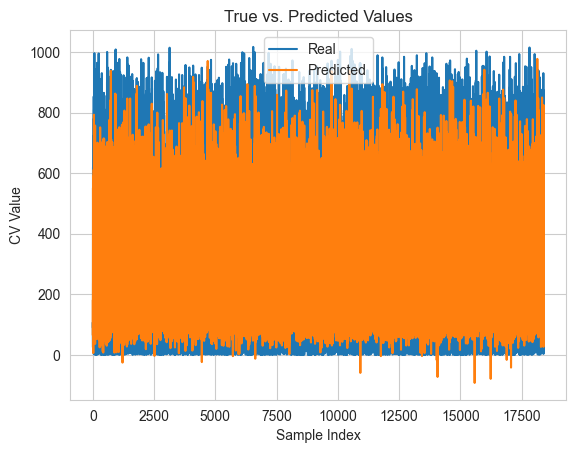

In [65]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Plot the true values and predicted values
plt.plot(y_train.values,label="Real")
plt.plot(y_P_train, label='Predicted')
plt.title('True vs. Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('CV Value')
r2 = r2_score(y_train,y_P_train)
print("R²:",r2)
plt.legend()
plt.show()

R²: 0.43855973700047246


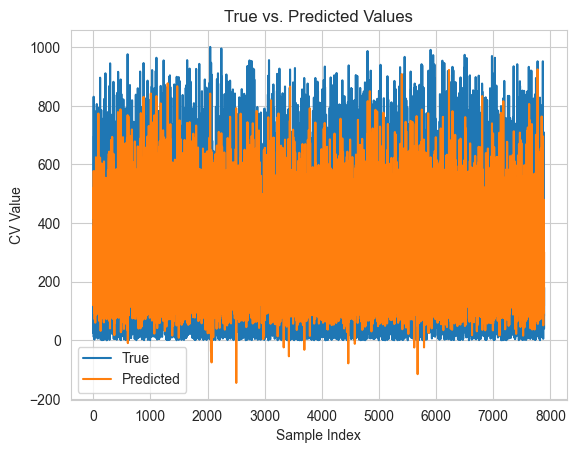

In [66]:


import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Plot the true values and predicted values
plt.plot(y_test.values, label='True')
plt.plot(y_pred, label='Predicted')
plt.title('True vs. Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('CV Value')
r2 = r2_score(y_test,y_pred)
print("R²:",r2)
plt.legend()
plt.show()